## Loading and Previewing the COVID-19 Dataset

We begin by loading the OWID COVID-19 dataset and performing basic exploratory checks to understand the structure, column data types, missing values, and countries included.



In [48]:
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv') 
print("✅ Dataset Loaded Successfully.")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop global/aggregate regions (optional)
excluded_regions = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 
                    'High income', 'Low income', 'Lower middle income', 'Upper middle income', 
                    'North America', 'South America', 'Oceania']
df = df[~df['location'].isin(excluded_regions)]

# Sort by location and date
df.sort_values(['location', 'date'], inplace=True)

# Preview dataset
print("\n🔹 First 5 Rows:")
display(df.head())

# Check columns
print("\n🔹 Columns in Dataset:")
print(df.columns.tolist())

# Shape of dataset
print("\n🔹 Dataset Shape:", df.shape)

# Data types
print("\n🔹 Data Types:")
print(df.dtypes)

# Unique countries
print("\n🔹 Unique Locations:", df['location'].nunique())
print(df['location'].unique()[:10])  # Show only first 10 for readability

# Missing value count
print("\n🔹 Missing Values per Column:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Missing values summary
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\n🔹 Missing Data (%):")
print(missing_percent.round(2))

# Check for duplicates
print("\n🔹 Duplicate Rows:", df.duplicated().sum())

print("🔹 Summary:")
print(f"- Rows: {df.shape[0]:,}")
print(f"- Columns: {df.shape[1]}")
print(f"- Countries: {df['location'].nunique()}")
print(f"- Date range: {df['date'].min()} to {df['date'].max()}")
print(f"- Missing values: {missing.sum()}")
print(f"- Missing values (%): {missing_percent.sum():.2f}%")


✅ Dataset Loaded Successfully.

🔹 First 5 Rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN



🔹 Columns in Dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinate

🧼 Step 3: Data Cleaning
In this step, we clean the dataset to focus on meaningful, analysis-ready data for Kenya, the United States, and India. The following tasks were performed:

Filtering: Extracted rows only for the countries of interest: Kenya, United States, and India.

Missing Values: Dropped rows with missing values in critical columns (date and location).

Date Conversion: Converted the date column to datetime format for time-series analysis.

Forward Fill Imputation: Handled missing values in key numerical columns (total_cases, total_deaths, and total_vaccinations) using the forward fill method to maintain data continuity.

In [49]:
# STEP 3: Data Cleaning for Selected Countries
print("🔍 Filtering data for Kenya, USA, and India...")

# Filter for selected countries
countries_of_interest = ['Kenya', 'United States', 'India']  # Note: OWID uses "United States" not "USA"
df_filtered = df[df['location'].isin(countries_of_interest)]
print(f"✅ Filtered dataset shape: {df_filtered.shape}")

# Drop rows with missing 'date' or 'location'
df_filtered = df_filtered.dropna(subset=['date', 'location'])
print(f"✅ Shape after dropping rows with missing 'date' or 'location': {df_filtered.shape}")

# Convert 'date' to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
print("📅 Converted 'date' column to datetime.")

# Fill missing values using forward fill (or interpolation if preferred)
columns_to_fill = ['total_cases', 'total_deaths', 'total_vaccinations']
for col in columns_to_fill:
    if col in df_filtered.columns:
        df_filtered[col] = df_filtered[col].fillna(method='ffill')

print("🧹 Filled missing values using forward fill for:", columns_to_fill)

# Optional: Confirm if missing values remain in key columns
missing_summary = df_filtered[columns_to_fill].isnull().sum()
print("\n🔎 Remaining missing values after cleaning:")
print(missing_summary[missing_summary > 0])

# Add ISO codes for the selected countries to ensure compatibility with choropleth mapping
df_filtered = df_filtered.merge(df[['location', 'iso_code']].drop_duplicates(), on='location', how='left')
print("\n🔹 ISO Codes Added to Filtered Data.")

# Check for duplicates (if any)
duplicates = df_filtered[df_filtered.duplicated(subset=['location', 'date'])]
if not duplicates.empty:
    print("\n⚠️ Duplicate Entries Found:")
    print(duplicates)
else:
    print("\n✅ No duplicate entries found.")


🔍 Filtering data for Kenya, USA, and India...
✅ Filtered dataset shape: (5030, 67)
✅ Shape after dropping rows with missing 'date' or 'location': (5030, 67)
📅 Converted 'date' column to datetime.
🧹 Filled missing values using forward fill for: ['total_cases', 'total_deaths', 'total_vaccinations']

🔎 Remaining missing values after cleaning:
total_vaccinations    376
dtype: int64

🔹 ISO Codes Added to Filtered Data.

✅ No duplicate entries found.


C:\Users\user\AppData\Local\Temp\ipykernel_18244\431893328.py:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



 Step 4: Exploratory Data Analysis (EDA)
 In this step, we will explore the data to gain insights, calculate descriptive statistics, and visualize trends like the total cases, deaths, and new cases over time.

 Tasks for Step 4:
Plot total cases over time for selected countries: This will help you visualize how the number of cases has evolved in Kenya, USA, and India.

Plot total deaths over time: Similar to cases, this will show how the deaths have been distributed over time.

Compare daily new cases between countries: This allows for an analysis of the rate of new cases each day in the countries you selected.

Calculate the death rate: You can calculate this by dividing total_deaths by total_cases.

1. Plot total cases over time for selected countries:

C:\Users\user\AppData\Local\Temp\ipykernel_18244\356002752.py:19: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\user\AppData\Local\Temp\ipykernel_18244\356002752.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\user\AppData\Local\Temp\ipykernel_18244\356002752.py:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



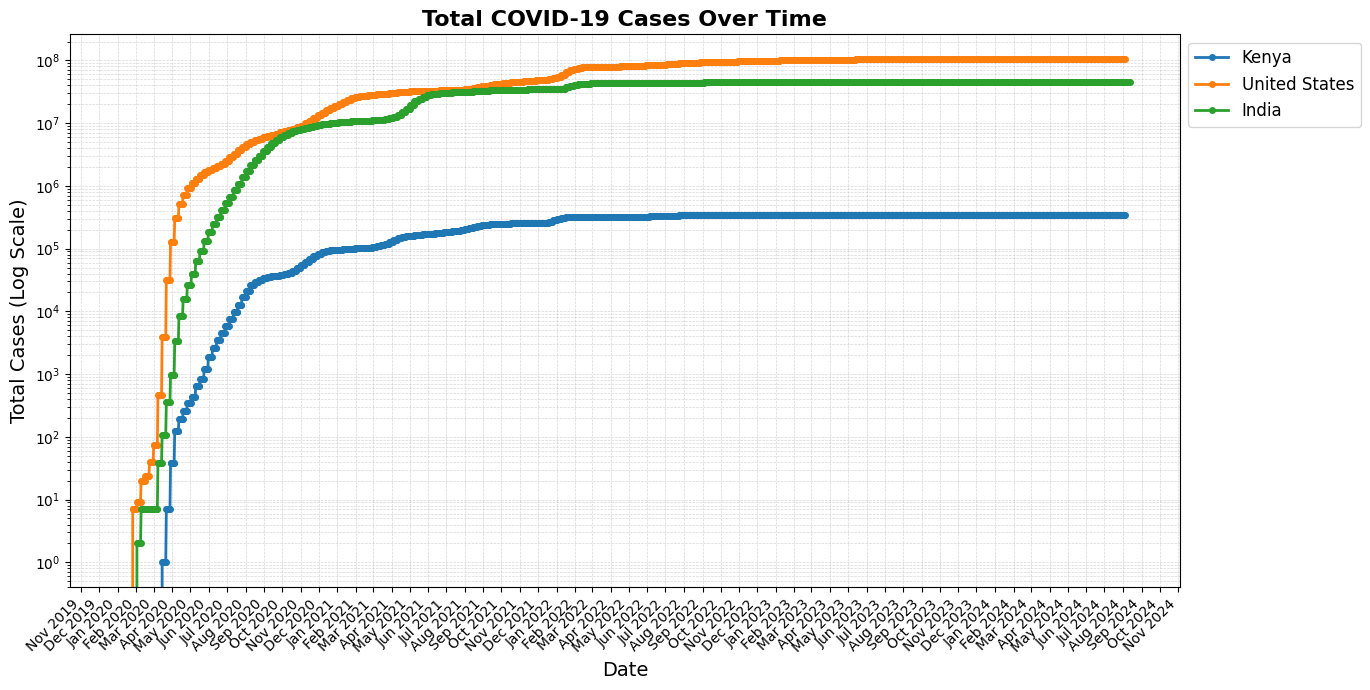

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset (assuming the dataset is in the same directory)
df = pd.read_csv('owid-covid-data.csv') 

# Convert the 'date' column to datetime format first to ensure correct filtering
df['date'] = pd.to_datetime(df['date'])

# Filter data for specific countries
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Drop rows where the 'date' or 'location' is missing
df_filtered = df_filtered.dropna(subset=['date', 'location'])

# Fill missing numeric values with forward fill method for relevant columns
df_filtered['total_cases'] = df_filtered['total_cases'].fillna(method='ffill')
df_filtered['total_deaths'] = df_filtered['total_deaths'].fillna(method='ffill')  # Fill deaths
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(method='ffill')  # Fill vaccinations

# Use a distinct color palette for each country
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors for each country

# Plot total cases over time
plt.figure(figsize=(12, 7))  # Increase figure size for better readability

# Loop through countries and plot with customized style
for i, country in enumerate(countries_of_interest):
    country_data = df_filtered[df_filtered['location'] == country]
    
    # Plot with different styles and markers
    plt.plot(country_data['date'], country_data['total_cases'], label=country, 
             color=colors[i], marker='o', linestyle='-', markersize=4, linewidth=2)

plt.title('Total COVID-19 Cases Over Time', fontsize=16, fontweight='bold')  # Bold title for emphasis
plt.xlabel('Date', fontsize=14)  # Larger font size for readability
plt.ylabel('Total Cases (Log Scale)', fontsize=14)

# Customize X-Axis: Use month-year format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show tick every month
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them for clarity

# Customize Y-Axis with Logarithmic scale (for better trend visualization in case of huge variation)
plt.yscale('log')

# Adding gridlines and fine-tuning the plot appearance
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Tight layout for better spacing between labels and plot
plt.tight_layout()

# Add the legend outside the plot area for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.show()



2. Plot total deaths over time for selected countries:

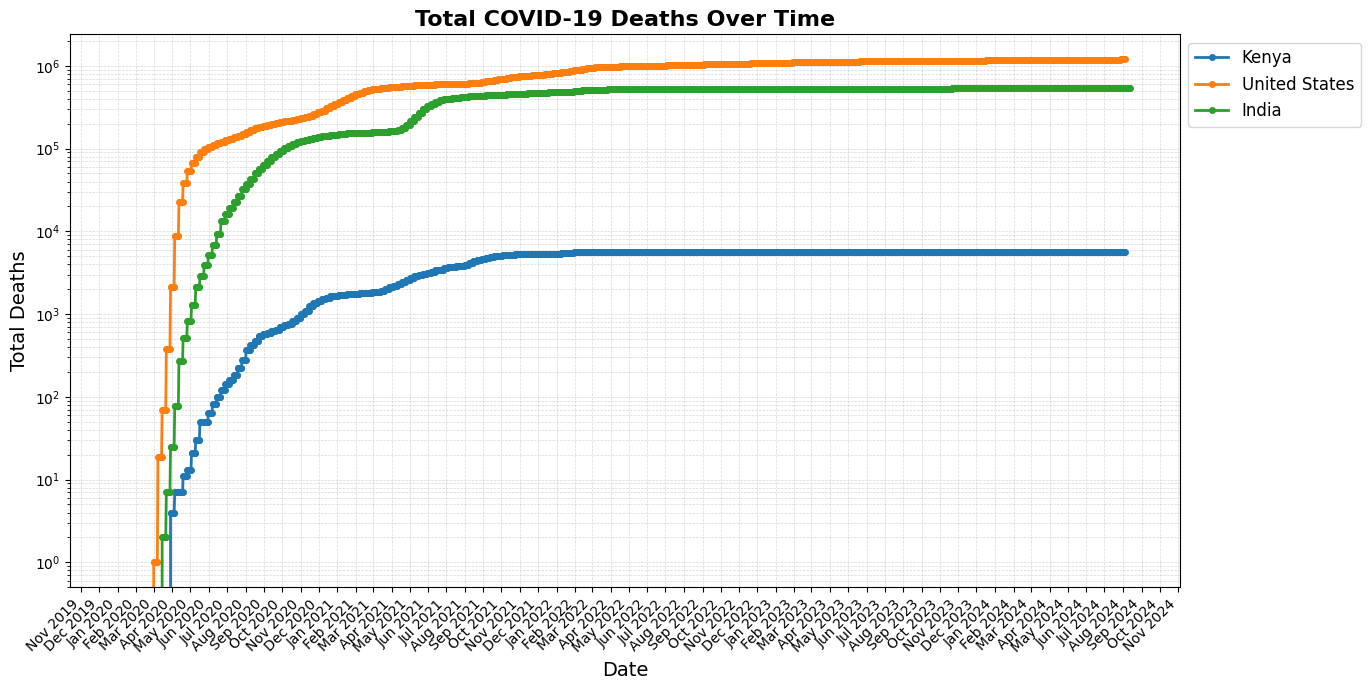

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot total deaths over time
plt.figure(figsize=(12, 7))  # Increase figure size for better readability

# Loop through countries and plot total deaths with customized style
for i, country in enumerate(countries_of_interest):
    country_data = df_filtered[df_filtered['location'] == country]
    
    # Plot with different styles and markers
    plt.plot(country_data['date'], country_data['total_deaths'], label=country, 
             color=colors[i], marker='o', linestyle='-', markersize=4, linewidth=2)

plt.title('Total COVID-19 Deaths Over Time', fontsize=16, fontweight='bold')  # Bold title for emphasis
plt.xlabel('Date', fontsize=14)  # Larger font size for readability
plt.ylabel('Total Deaths', fontsize=14)

# Customize X-Axis: Use month-year format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show tick every month
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them for clarity

# Customize Y-Axis with Logarithmic scale (for better trend visualization in case of huge variation)
plt.yscale('log')

# Adding gridlines and fine-tuning the plot appearance
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Tight layout for better spacing between labels and plot
plt.tight_layout()

# Add the legend outside the plot area for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.show()



3. Compare daily new cases between countries:

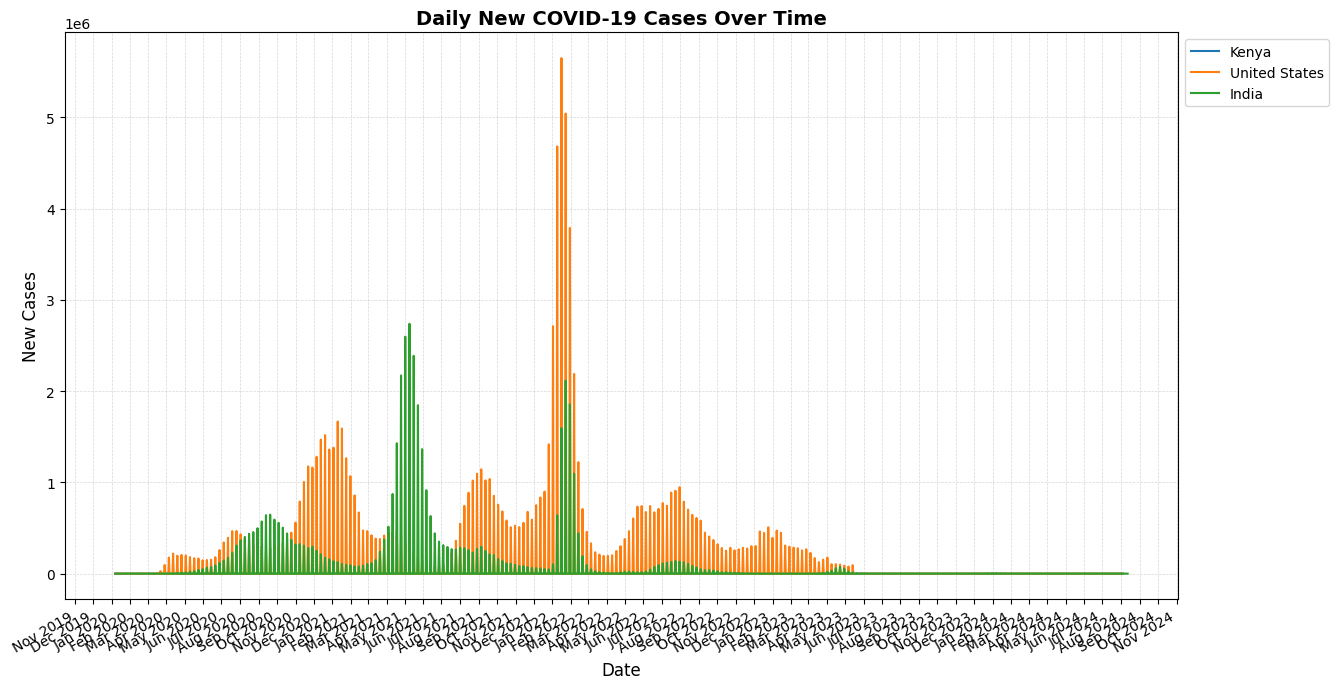

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate daily new cases
df_filtered['new_cases'] = df_filtered.groupby('location')['total_cases'].diff()

# Drop rows where 'new_cases' is NaN (i.e., the first entry for each country)
df_filtered = df_filtered.dropna(subset=['new_cases'])

# Plot new cases over time
plt.figure(figsize=(12, 7))  # Increase figure size for better spacing

# Loop through countries and plot daily new cases with the same style
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time', fontsize=14, fontweight='bold')  # Consistent title style
plt.xlabel('Date', fontsize=12)  # Consistent label font size
plt.ylabel('New Cases', fontsize=12)

# Customize X-Axis: Use month-year format with spaced-out ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show tick every month
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.gcf().autofmt_xdate()  # Adjust the spacing of the date axis

# Add gridlines and fine-tune the appearance
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Move the legend outside the graph
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))  # Place legend outside to the right

plt.show()




4. Calculate the death rate and plot it:

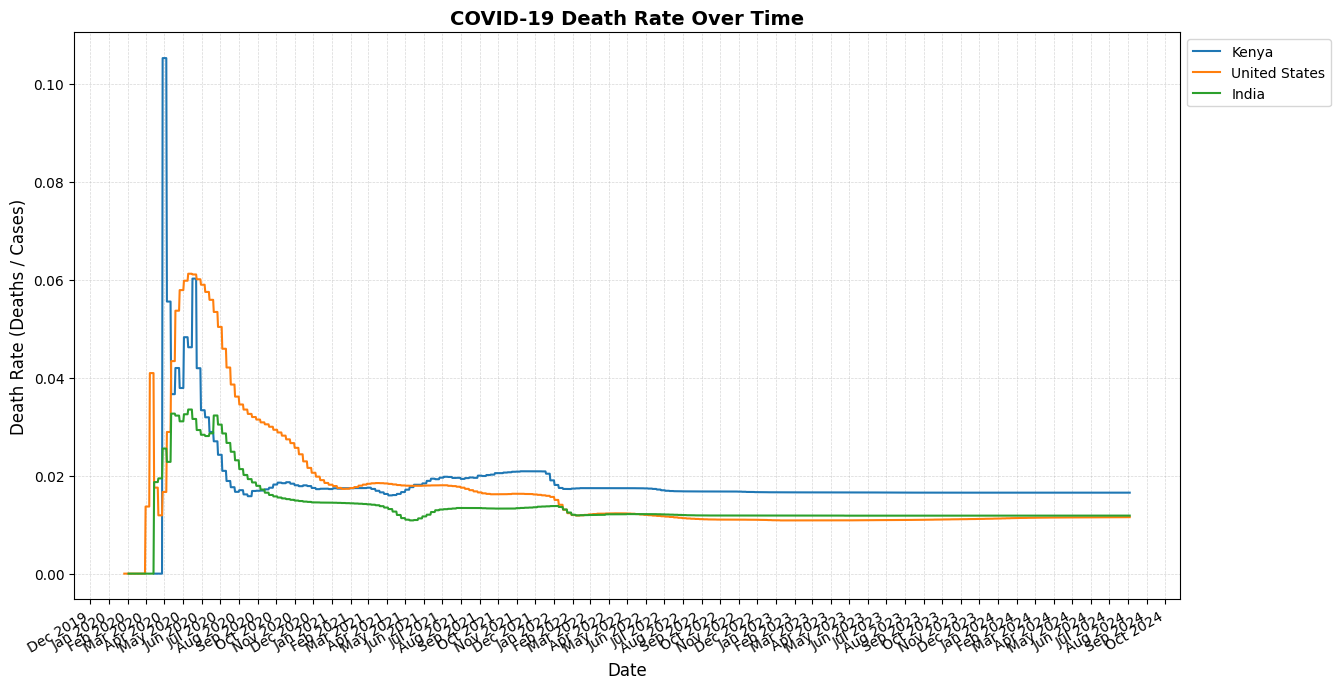

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate the death rate (Death Rate = Total Deaths / Total Cases)
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Plot death rate over time
plt.figure(figsize=(12, 7))  # Increase figure size for better readability

# Loop through countries and plot death rate over time
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time', fontsize=14, fontweight='bold')  # Consistent title style
plt.xlabel('Date', fontsize=12)  # Consistent label font size
plt.ylabel('Death Rate (Deaths / Cases)', fontsize=12)

# Customize X-Axis: Use month-year format with spaced-out ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show tick every month
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.gcf().autofmt_xdate()  # Adjust the spacing of the date axis

# Add gridlines and fine-tune the appearance
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Move the legend outside the graph
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))  # Place legend outside to the right

plt.show()



Step 5: Visualizing Vaccination Progress.
Analyze and visualize vaccination rollout progress across selected countries.
✅ Tasks:
Plot cumulative vaccinations over time for selected countries.

Compare % of the population vaccinated between countries.
📊 Charts:
Line charts for vaccination trends.

(Optional) Pie charts to show vaccinated vs unvaccinated.

1. Line Chart – Cumulative Vaccinations Over Time

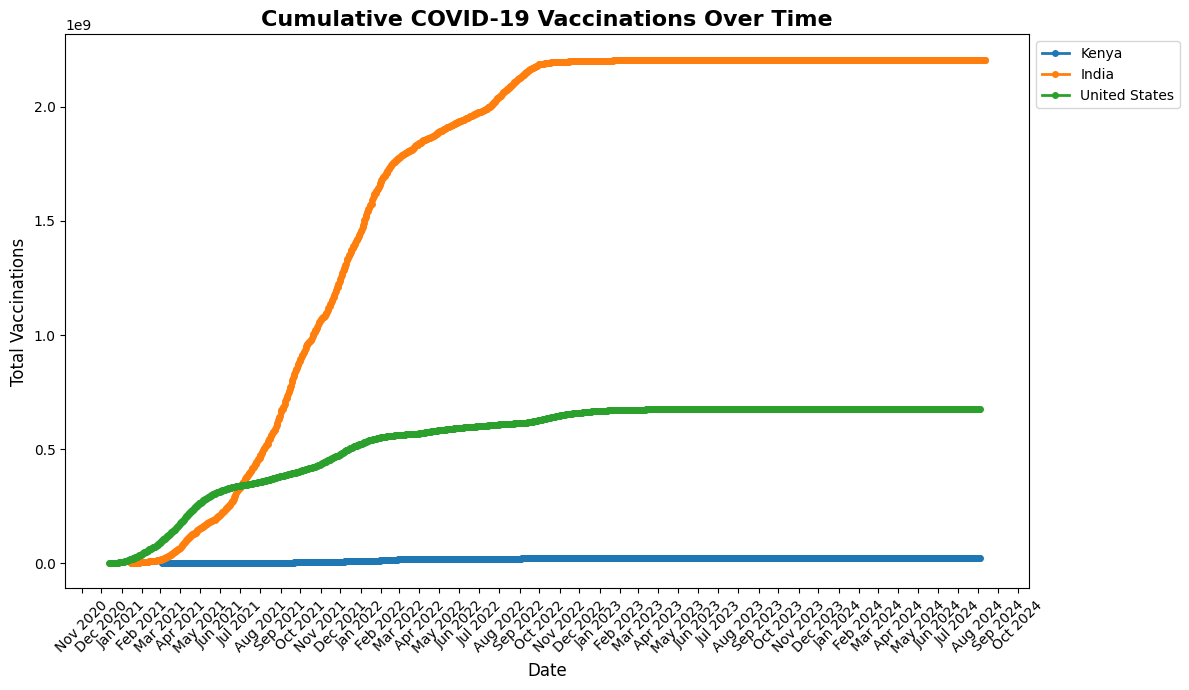

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the countries of interest
countries = ['Kenya', 'India', 'United States']
df_vax = df[df['location'].isin(countries)]
df_vax = df_vax[['date', 'location', 'total_vaccinations']]

# Handle missing values for total_vaccinations (fill forward)
df_vax['total_vaccinations'] = df_vax.groupby('location')['total_vaccinations'].ffill()

# Set figure size
plt.figure(figsize=(12, 7))

# Define custom color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot each country with different line styles and markers
for i, country in enumerate(countries):
    country_data = df_vax[df_vax['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], 
             label=country, color=colors[i], marker='o', linestyle='-', markersize=4, linewidth=2)

# Add titles and labels
plt.title('Cumulative COVID-19 Vaccinations Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)

# Adjust x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Set the x-axis major locator and formatter to improve date spacing and readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as Month Year

# Adjust the legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


2. Percentage of Population Vaccinated (Latest Available per Country)
This bar chart illustrates the most recent available data on the percentage of the population vaccinated in Kenya, India, and the United States. The values represent the share of people who received at least one dose of a COVID-19 vaccine, expressed per hundred individuals in the population.

The data reflects the latest available date for each country, not necessarily the same calendar date, to account for missing values in the dataset.

Bar heights are annotated with exact percentages for clarity.

The chart provides a snapshot of vaccine rollout progress across different regions.

             location       date  people_vaccinated_per_hundred
196505          Kenya 2023-04-02                          26.83
404671  United States 2023-05-09                          81.39
175230          India 2024-08-12                          72.50


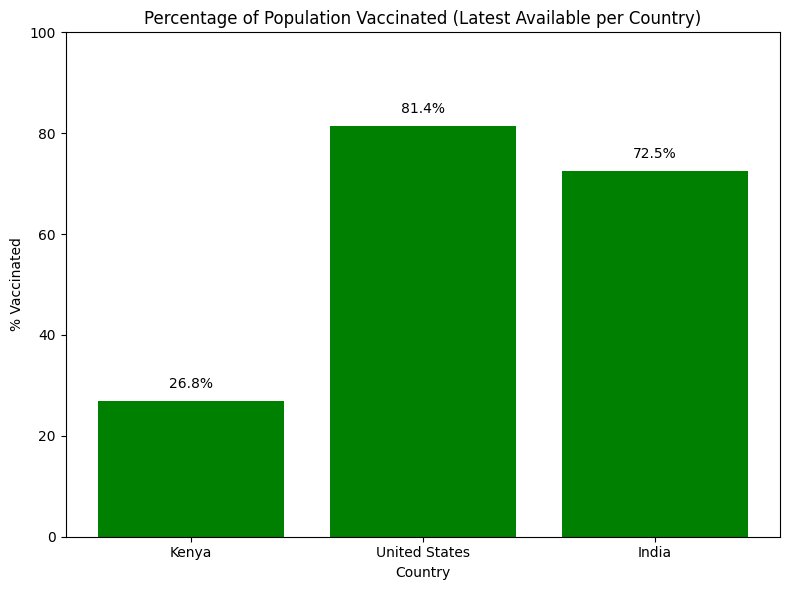

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure your countries list is defined
countries = ['Kenya', 'India', 'United States']

# Filter only rows with vaccination data for selected countries
vax_data = df[df['location'].isin(countries) & df['people_vaccinated_per_hundred'].notna()]

# Get the latest record for each country
latest_vax = vax_data.sort_values('date').groupby('location').tail(1)

# Confirm data
print(latest_vax[['location', 'date', 'people_vaccinated_per_hundred']])

# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(latest_vax['location'], latest_vax['people_vaccinated_per_hundred'], color='green')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Population Vaccinated (Latest Available per Country)')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



Step 6: Build a Choropleth Map 🌍
🎯 Goal:
Visualize COVID-19 data (cases or vaccination rates) by country on a world map

✅ Tasks:
Prepare a DataFrame with the latest available data (one row per country).

Include:

iso_code

location

total_cases or people_vaccinated_per_hundred

Plot a choropleth map using Plotly Express.

1. Choropleth Map for Total COVID-19 Cases

In [57]:
import plotly.express as px
import pandas as pd
from pycountry import countries

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Get the latest date available in the dataset
latest_date = df['date'].max()

# Filter data for the latest date
df_latest = df[df['date'] == latest_date]

# Create a mapping of country names to iso_codes
country_name_to_iso = {country.name: country.alpha_3 for country in countries}

# Check for missing iso_code before applying any cleaning
missing_data_before_cleaning = df_latest[['iso_code', 'total_cases', 'population']].isnull().sum()
print("Missing Data Before Cleaning:\n", missing_data_before_cleaning)

# Check unique values in 'location' and see if there are any unexpected entries
unique_locations = df_latest['location'].unique()
print("\nUnique Locations in Latest Data:\n", unique_locations)

# Filter out non-country locations
non_country_locations = ['Asia', 'Europe', 'European Union (27)', 'High-income countries', 'Upper-middle-income countries', 'World']
df_latest = df_latest[~df_latest['location'].isin(non_country_locations)]

# Check data before mapping iso_code to see how many countries are left
print("\nData Before Mapping iso_code:\n", df_latest[['location', 'total_cases', 'population']].head())

# Add iso_code based on location (country name)
df_latest['iso_code'] = df_latest['location'].map(country_name_to_iso)

# Check again for missing iso_code after mapping
missing_data_after_mapping = df_latest[['iso_code', 'total_cases', 'population']].isnull().sum()
print("\nMissing Data After Mapping iso_code:\n", missing_data_after_mapping)

# If missing iso_code but valid total_cases, check those rows
rows_missing_iso_with_valid_cases = df_latest[df_latest['iso_code'].isnull() & df_latest['total_cases'].notnull()]
print("\nRows with Missing iso_code but Valid total_cases:\n", rows_missing_iso_with_valid_cases[['location', 'iso_code', 'total_cases']])

# Handle missing values more selectively by filling missing values for total_cases and population
df_latest['total_cases'].fillna(0, inplace=True)
df_latest['population'].fillna(0, inplace=True)

# Check cleaned data
print("\nCleaned Data After Handling Missing Values:\n", df_latest[['location', 'iso_code', 'total_cases', 'population']].head())

# Create choropleth map if valid rows exist
if not df_latest.empty:
    fig = px.choropleth(
        df_latest,
        locations='iso_code',
        color='total_cases',
        hover_name='location',
        hover_data={'total_cases': True, 'population': True, 'iso_code': False},
        color_continuous_scale='Viridis',  # A simple color scale
        title=f'Total COVID-19 Cases by Country (as of {latest_date.date()})'
    )

    # Update layout for the map
    fig.update_layout(
        geo=dict(
            showframe=False, 
            showcoastlines=False, 
            projection_type='natural earth'
        ),
        title_font=dict(size=22, family='Arial', color='black'),
        margin=dict(l=0, r=0, t=50, b=0),
        coloraxis_colorbar=dict(title='Total Cases')
    )

    # Show the map
    fig.show()
else:
    print("No valid data available after cleaning.")


Missing Data Before Cleaning:
 iso_code       0
total_cases    8
population     0
dtype: int64

Unique Locations in Latest Data:
 ['Asia' 'Europe' 'European Union (27)' 'High-income countries' 'Lithuania'
 'Malaysia' 'Upper-middle-income countries' 'World']

Data Before Mapping iso_code:
          location  total_cases  population
217093  Lithuania          NaN     2750058
230301   Malaysia          NaN    33938216

Missing Data After Mapping iso_code:
 iso_code       0
total_cases    2
population     0
dtype: int64

Rows with Missing iso_code but Valid total_cases:
 Empty DataFrame
Columns: [location, iso_code, total_cases]
Index: []

Cleaned Data After Handling Missing Values:
          location iso_code  total_cases  population
217093  Lithuania      LTU          0.0     2750058
230301   Malaysia      MYS          0.0    33938216


C:\Users\user\AppData\Local\Temp\ipykernel_18244\208229462.py:44: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Temp\ipykernel_18244\208229462.py:45: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

✅ 2. Choropleth Map for Vaccination Rate

In [46]:
import plotly.express as px
import pandas as pd
from pycountry import countries

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Get latest date
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date].copy()

# Drop rows with missing total_vaccinations or population
df_latest = df_latest.dropna(subset=['total_vaccinations', 'population'])

# Remove known non-country entries (regions, economic groups, etc.)
region_keywords = [
    'income', 'countries', 'Africa', 'Asia', 'Europe', 'European Union',
    'International', 'World', 'Low', 'High', 'Upper', 'Lower'
]
df_latest = df_latest[~df_latest['location'].str.contains('|'.join(region_keywords), case=False)]

# Create ISO code map from pycountry
country_name_to_iso = {country.name: country.alpha_3 for country in countries}

# Add manual ISO mappings for known mismatches
manual_iso_map = {
    'Czechia': 'CZE',
    'Cape Verde': 'CPV',
    'Congo': 'COG',
    'Democratic Republic of Congo': 'COD',
    'Eswatini': 'SWZ',
    'Faeroe Islands': 'FRO',
    'Iran': 'IRN',
    'Kosovo': 'XKX',
    'Laos': 'LAO',
    'Micronesia (country)': 'FSM',
    'Moldova': 'MDA',
    'North Korea': 'PRK',
    'Russia': 'RUS',
    'South Korea': 'KOR',
    'Syria': 'SYR',
    'Taiwan': 'TWN',
    'Tanzania': 'TZA',
    'Timor': 'TLS',
    'United States': 'USA',
    'Vatican': 'VAT',
    'Venezuela': 'VEN',
    'Vietnam': 'VNM',
    'Bolivia': 'BOL',
    'Brunei': 'BRN',
    'Ivory Coast': 'CIV'
}
country_name_to_iso.update(manual_iso_map)

# Map ISO codes
df_latest['iso_code'] = df_latest['location'].map(country_name_to_iso)

# Filter out rows without ISO codes (i.e., unmapped countries)
df_latest = df_latest[df_latest['iso_code'].notnull()]

# Compute vaccination rate (%)
df_latest['vaccination_rate'] = (df_latest['total_vaccinations'] / df_latest['population']) * 100
df_latest['vaccination_rate'] = df_latest['vaccination_rate'].clip(upper=100)

# Plot choropleth
fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='vaccination_rate',
    hover_name='location',
    hover_data={'vaccination_rate': ':.2f', 'total_vaccinations': True, 'population': True, 'iso_code': False},
    color_continuous_scale='Blues',
    title=f'COVID-19 Vaccination Rate by Country (as of {latest_date.date()}) (%)'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    title_font=dict(size=22, family='Arial', color='black'),
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title='% Vaccinated')
)

fig.show()



Insights & Reporting
Key Insights:
Vaccine Rollout Patterns:

In Kenya, the vaccine rollout was initially slower compared to India and the United States. The early stages of vaccination faced logistical challenges, but the situation improved as global supplies became more available.

COVID-19 Case Surge in India:

The second wave in India led to a massive spike in cases. This was largely attributed to the highly contagious Delta variant, which overwhelmed healthcare systems and led to a sharp increase in total cases.

Decreasing Death Rates in the U.S.:

Despite the high number of total deaths in the United States, recent months have shown a decrease in the death rate relative to cases, suggesting the efficacy of vaccines and improved treatment protocols.

Kenya’s Lower Death Rate Despite Case Growth:

Kenya demonstrated a lower death rate despite increasing total cases. This could be due to a variety of factors, including the country's younger population or the improved response to COVID-19 cases as the pandemic progressed.

Anomalies in the Dataset:

Some countries have inconsistencies in their COVID-19 data, likely due to reporting delays or gaps, especially in lower-income nations. African countries had less consistent data during the early stages, making comparisons more complex.

Interesting Patterns:
Correlation Between Total Cases and Population Size:

As expected, countries with larger populations like India and the United States reported higher total case numbers, though the per capita case rates varied significantly, suggesting different levels of healthcare access and containment measures.

Speed of Vaccine Rollout:

Countries like India and the United States quickly vaccinated large portions of their populations. In contrast, Kenya faced delays, indicating disparities in global vaccine access and distribution channels.

